## EDA #


In [1]:
# Read data

import pandas as pd

df = pd.read_csv('data/hmeq.csv')

df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [4]:
print(df.shape)
df.info()

(5960, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [5]:
num_cols = df.select_dtypes(include=['float64', 'int64']) 
cat_cols = df.select_dtypes(include=['object']) 

for col in cat_cols:
    print('Values in the {} Column: {}'.format(col,df[col].unique()))
    print('__'*40)

Values in the REASON Column: ['HomeImp' nan 'DebtCon']
________________________________________________________________________________
Values in the JOB Column: ['Other' nan 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self']
________________________________________________________________________________


In [6]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

Kiểm tra phân phối 

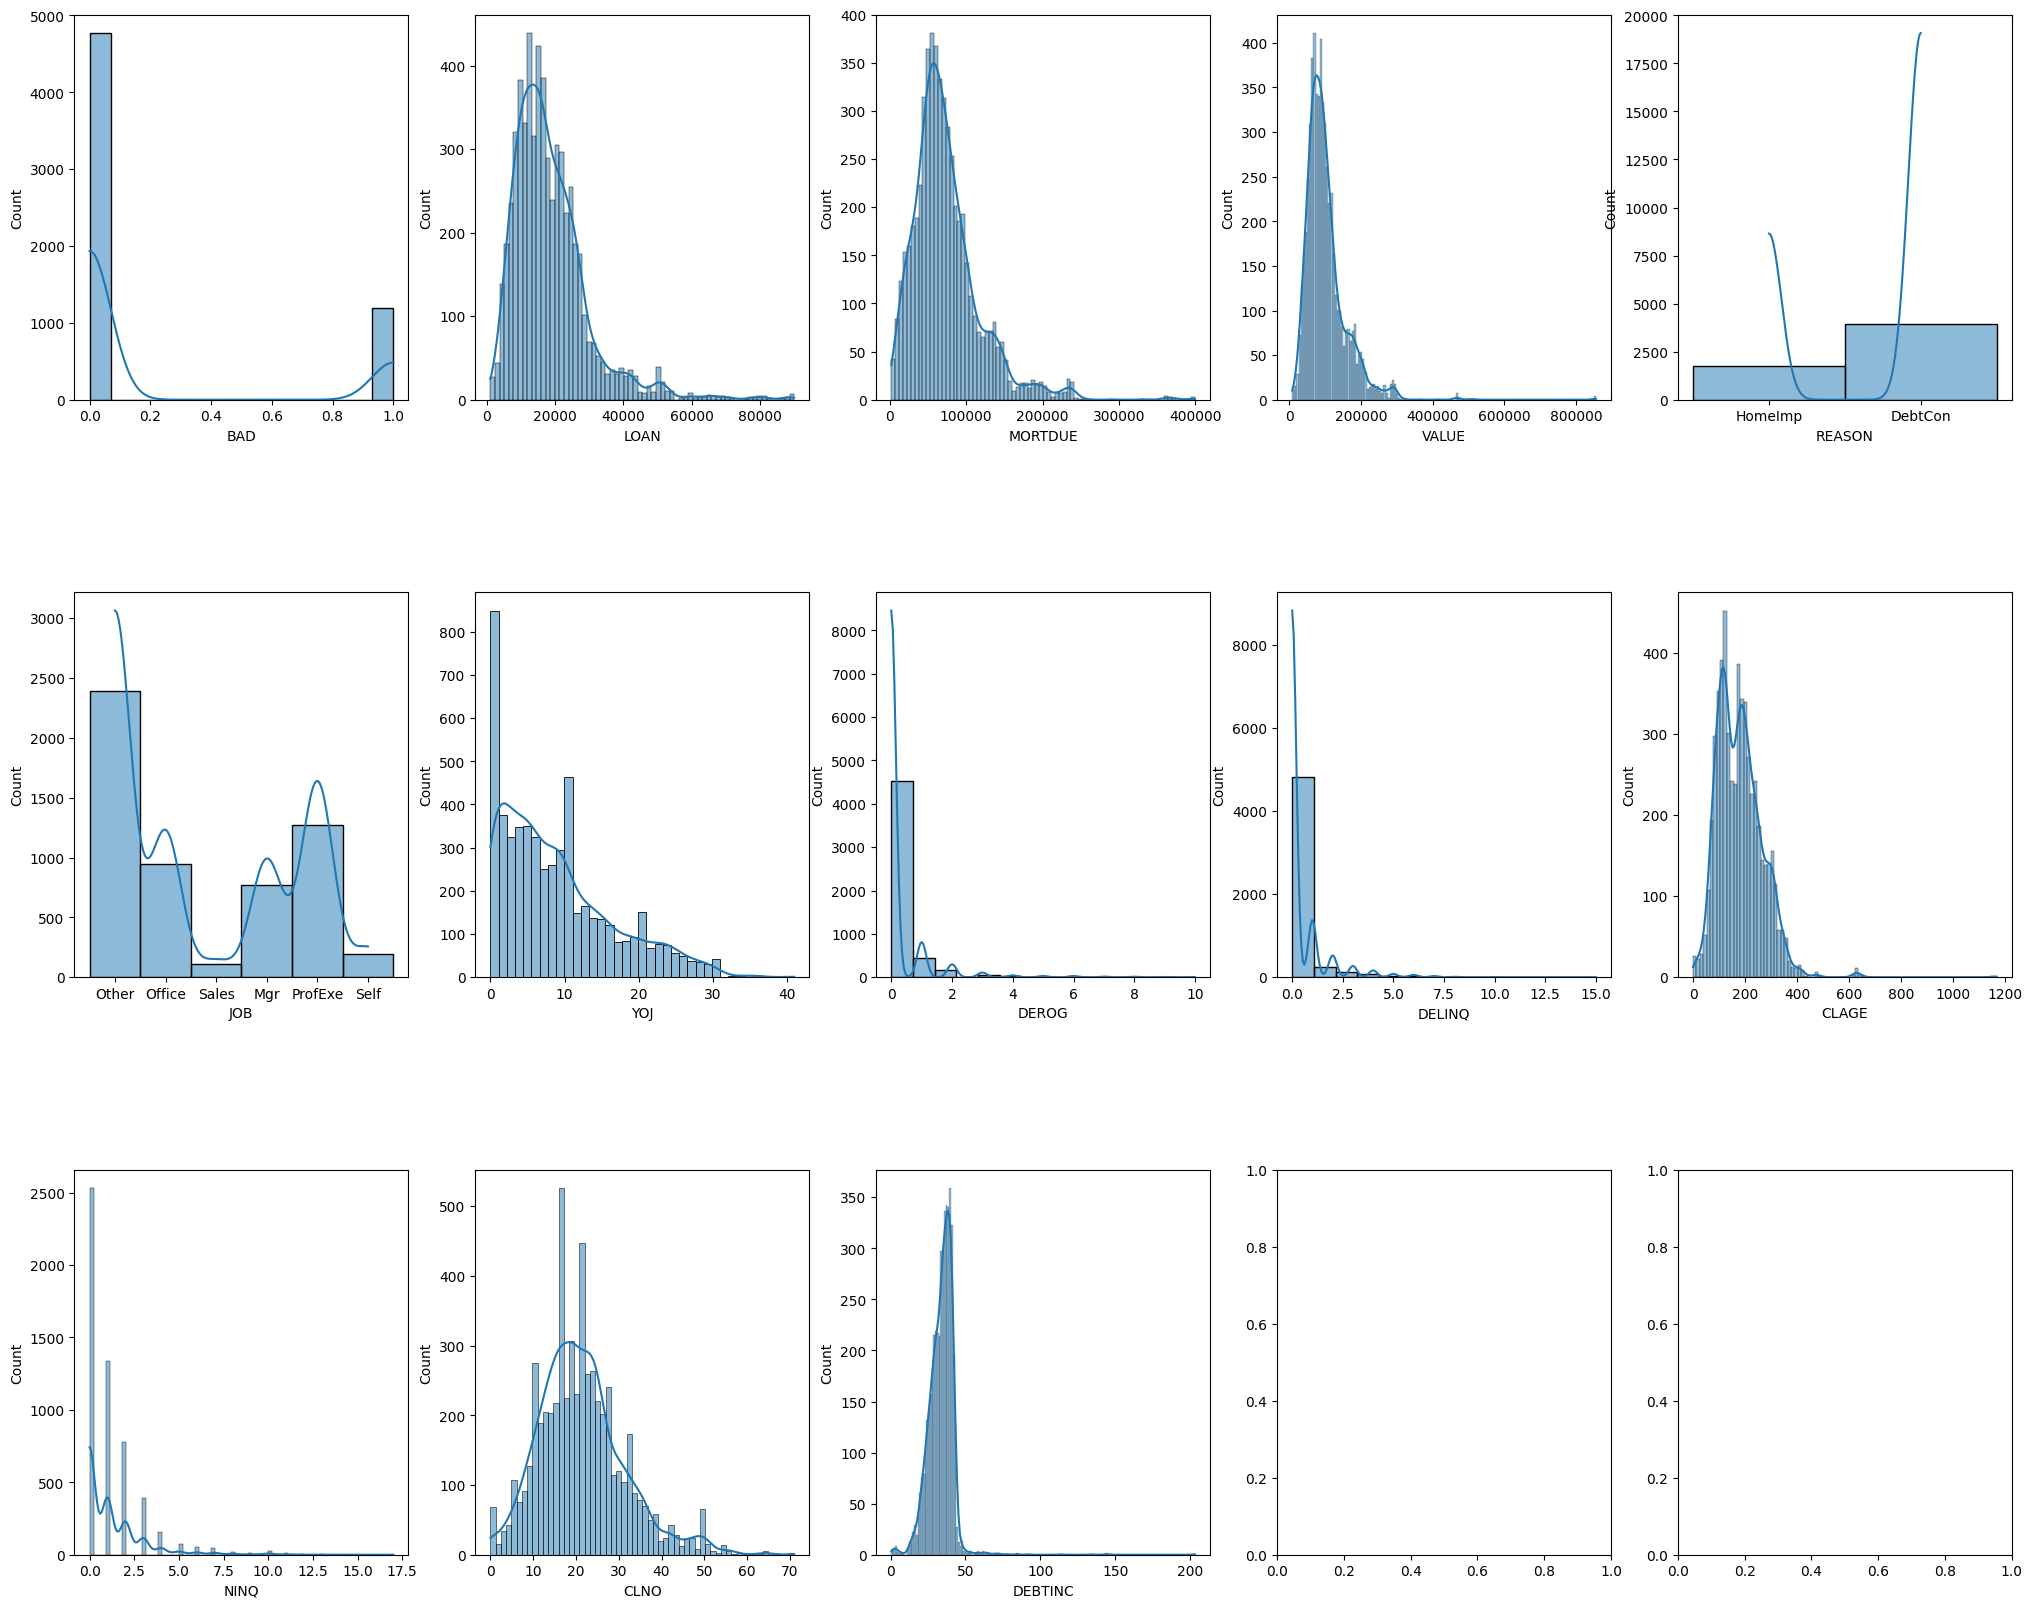

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(3, 5, figsize=(25, 20))
for i,ax in zip(df.columns,axes.flat):
    sns.histplot(data=df,x=i,ax=ax,kde=True)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Hầu hết các biến liên tục có phân phối lệch phải -> fill bằng median, mode

Fill biến liên tục:

In [8]:
# MORTDUE
df['MORTDUE'] = df['MORTDUE'].fillna(df['MORTDUE'].median())

# VALUE
df['VALUE'] = df['VALUE'].fillna(df['VALUE'].median())

# YOJ
df['YOJ'] = df['YOJ'].fillna(df['YOJ'].median())

# CLAGE
df['CLAGE'] = df['CLAGE'].fillna(df['CLAGE'].median())


# DEBTINC
df['DEBTINC'] = df['DEBTINC'].fillna(df['DEBTINC'].median())


Fill biến rời rạc:

In [9]:
# DEROG
df['DEROG'] = df['DEROG'].fillna(df['DEROG'].mode()[0])

# DELINQ
df['DELINQ'] = df['DELINQ'].fillna(df['DELINQ'].mode()[0])

# NINQ
df['NINQ'] = df['NINQ'].fillna(df['NINQ'].mode()[0])

# CLNO
df['CLNO'] = df['CLNO'].fillna(df['CLNO'].mode()[0])



In [10]:
df["REASON"] = df["REASON"].fillna("Other reason")

df['JOB'] = df['JOB'].fillna("Other")

Kiểm tra lại phân bố

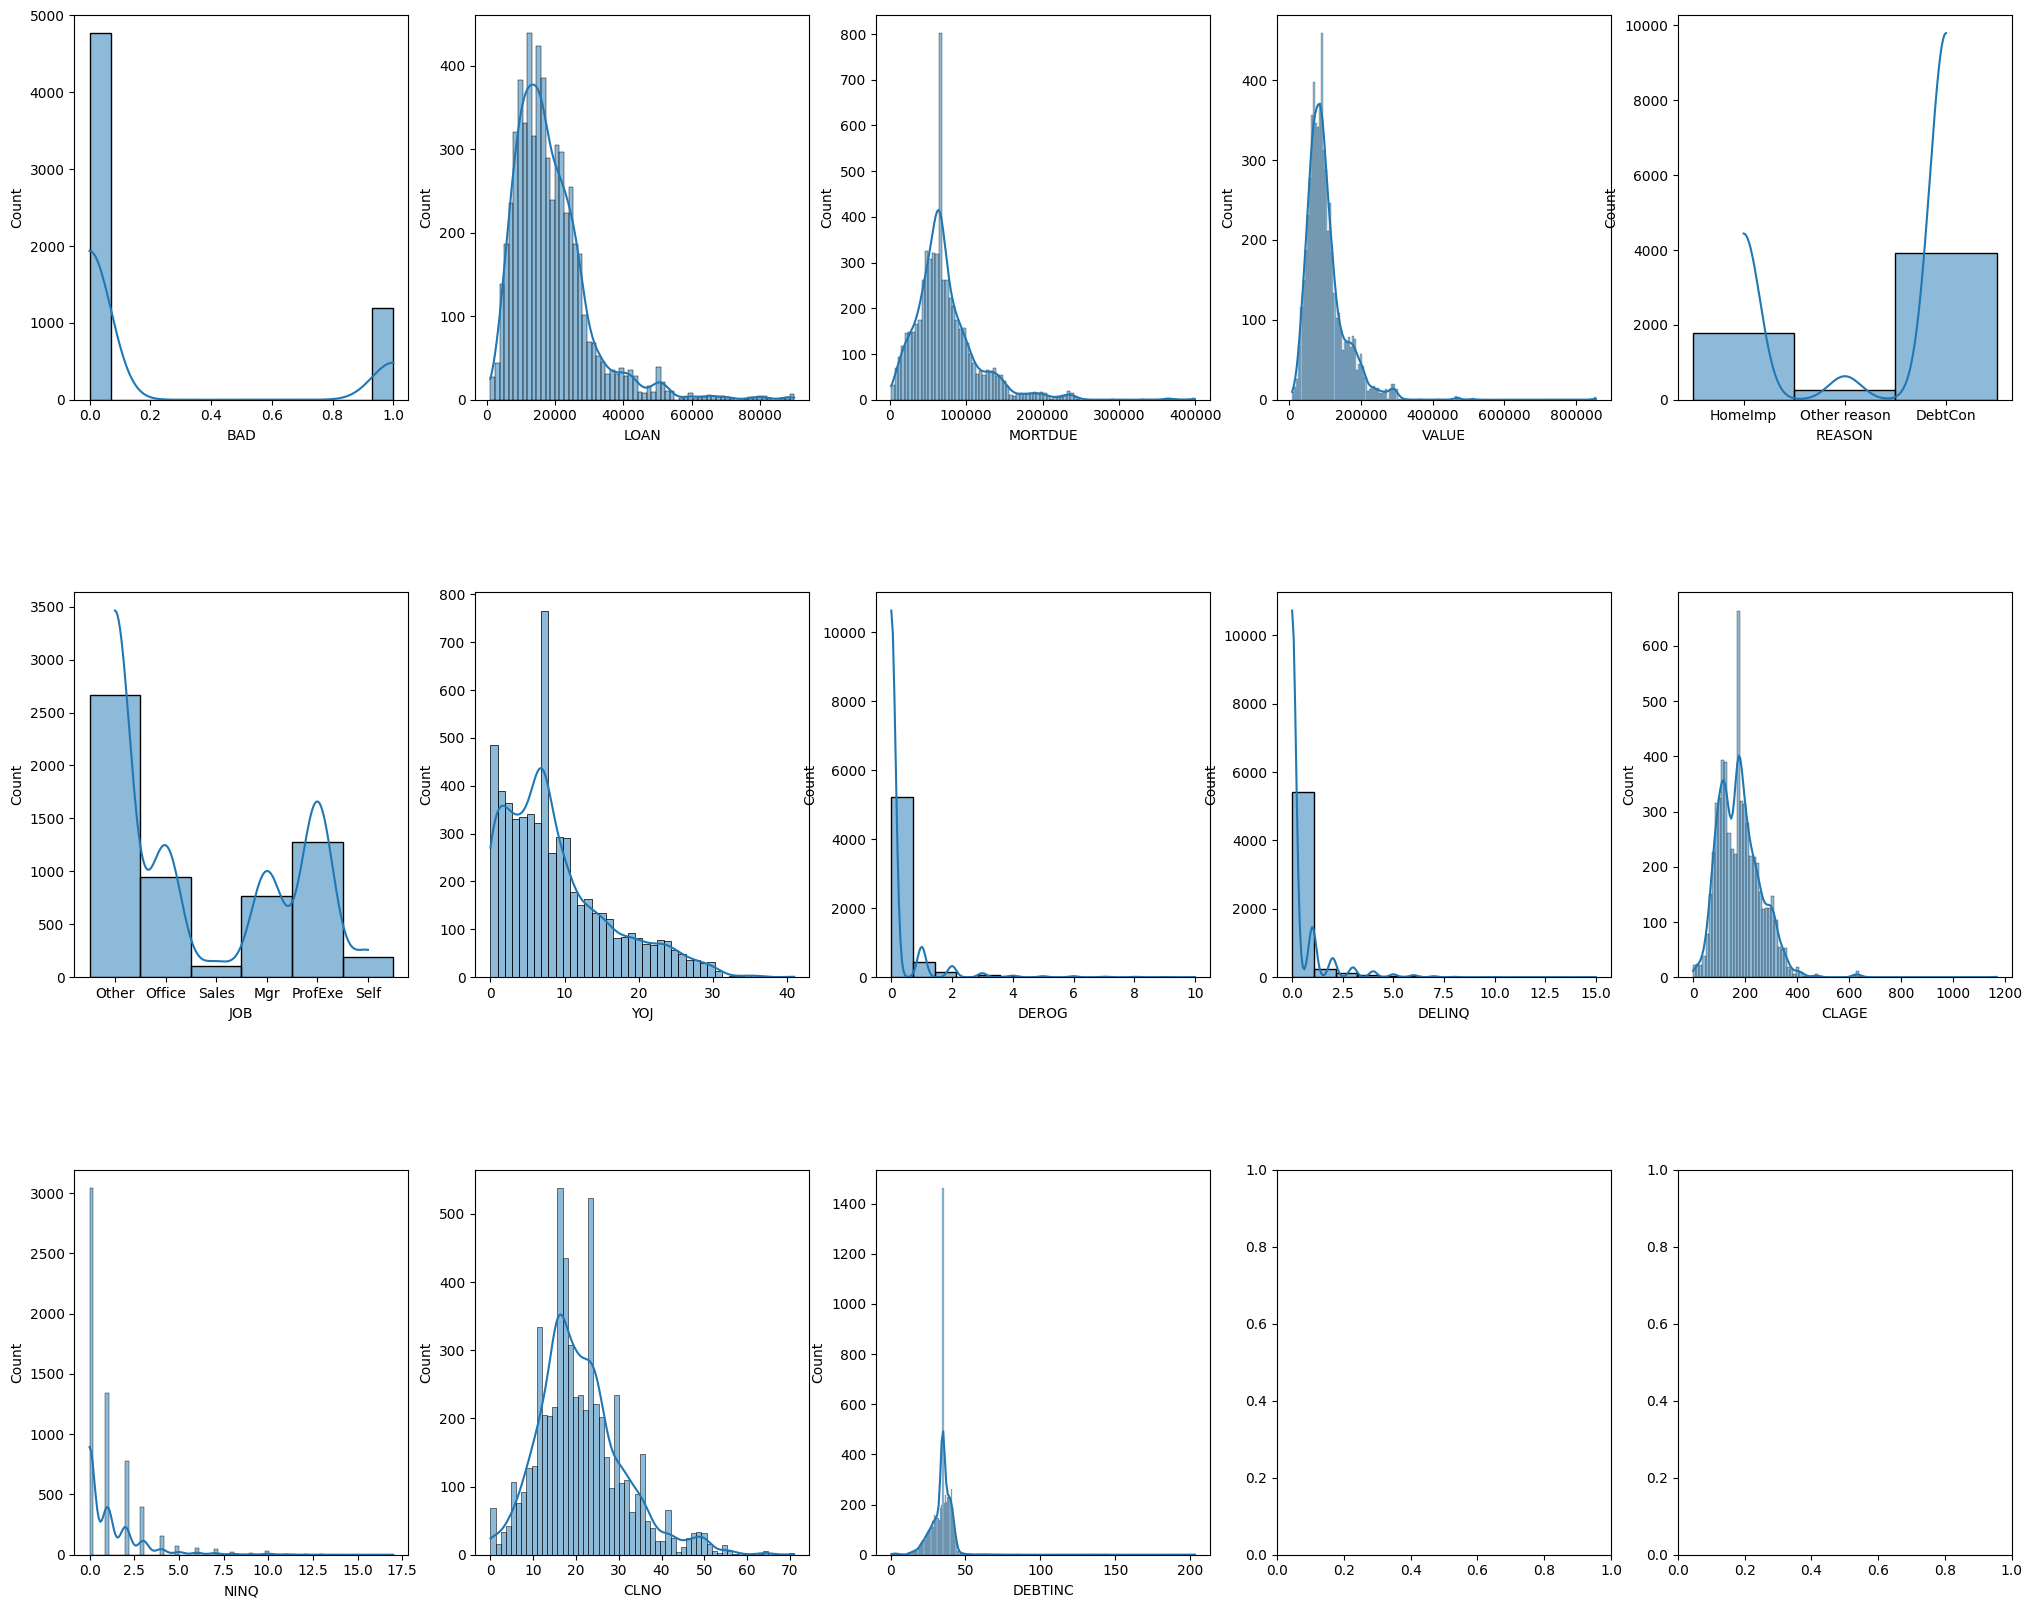

In [12]:
fig, axes = plt.subplots(3, 5, figsize=(25, 20))
for i,ax in zip(df.columns,axes.flat):
    sns.histplot(data=df,x=i,ax=ax,kde=True)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [13]:
df.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

Handling outliers 

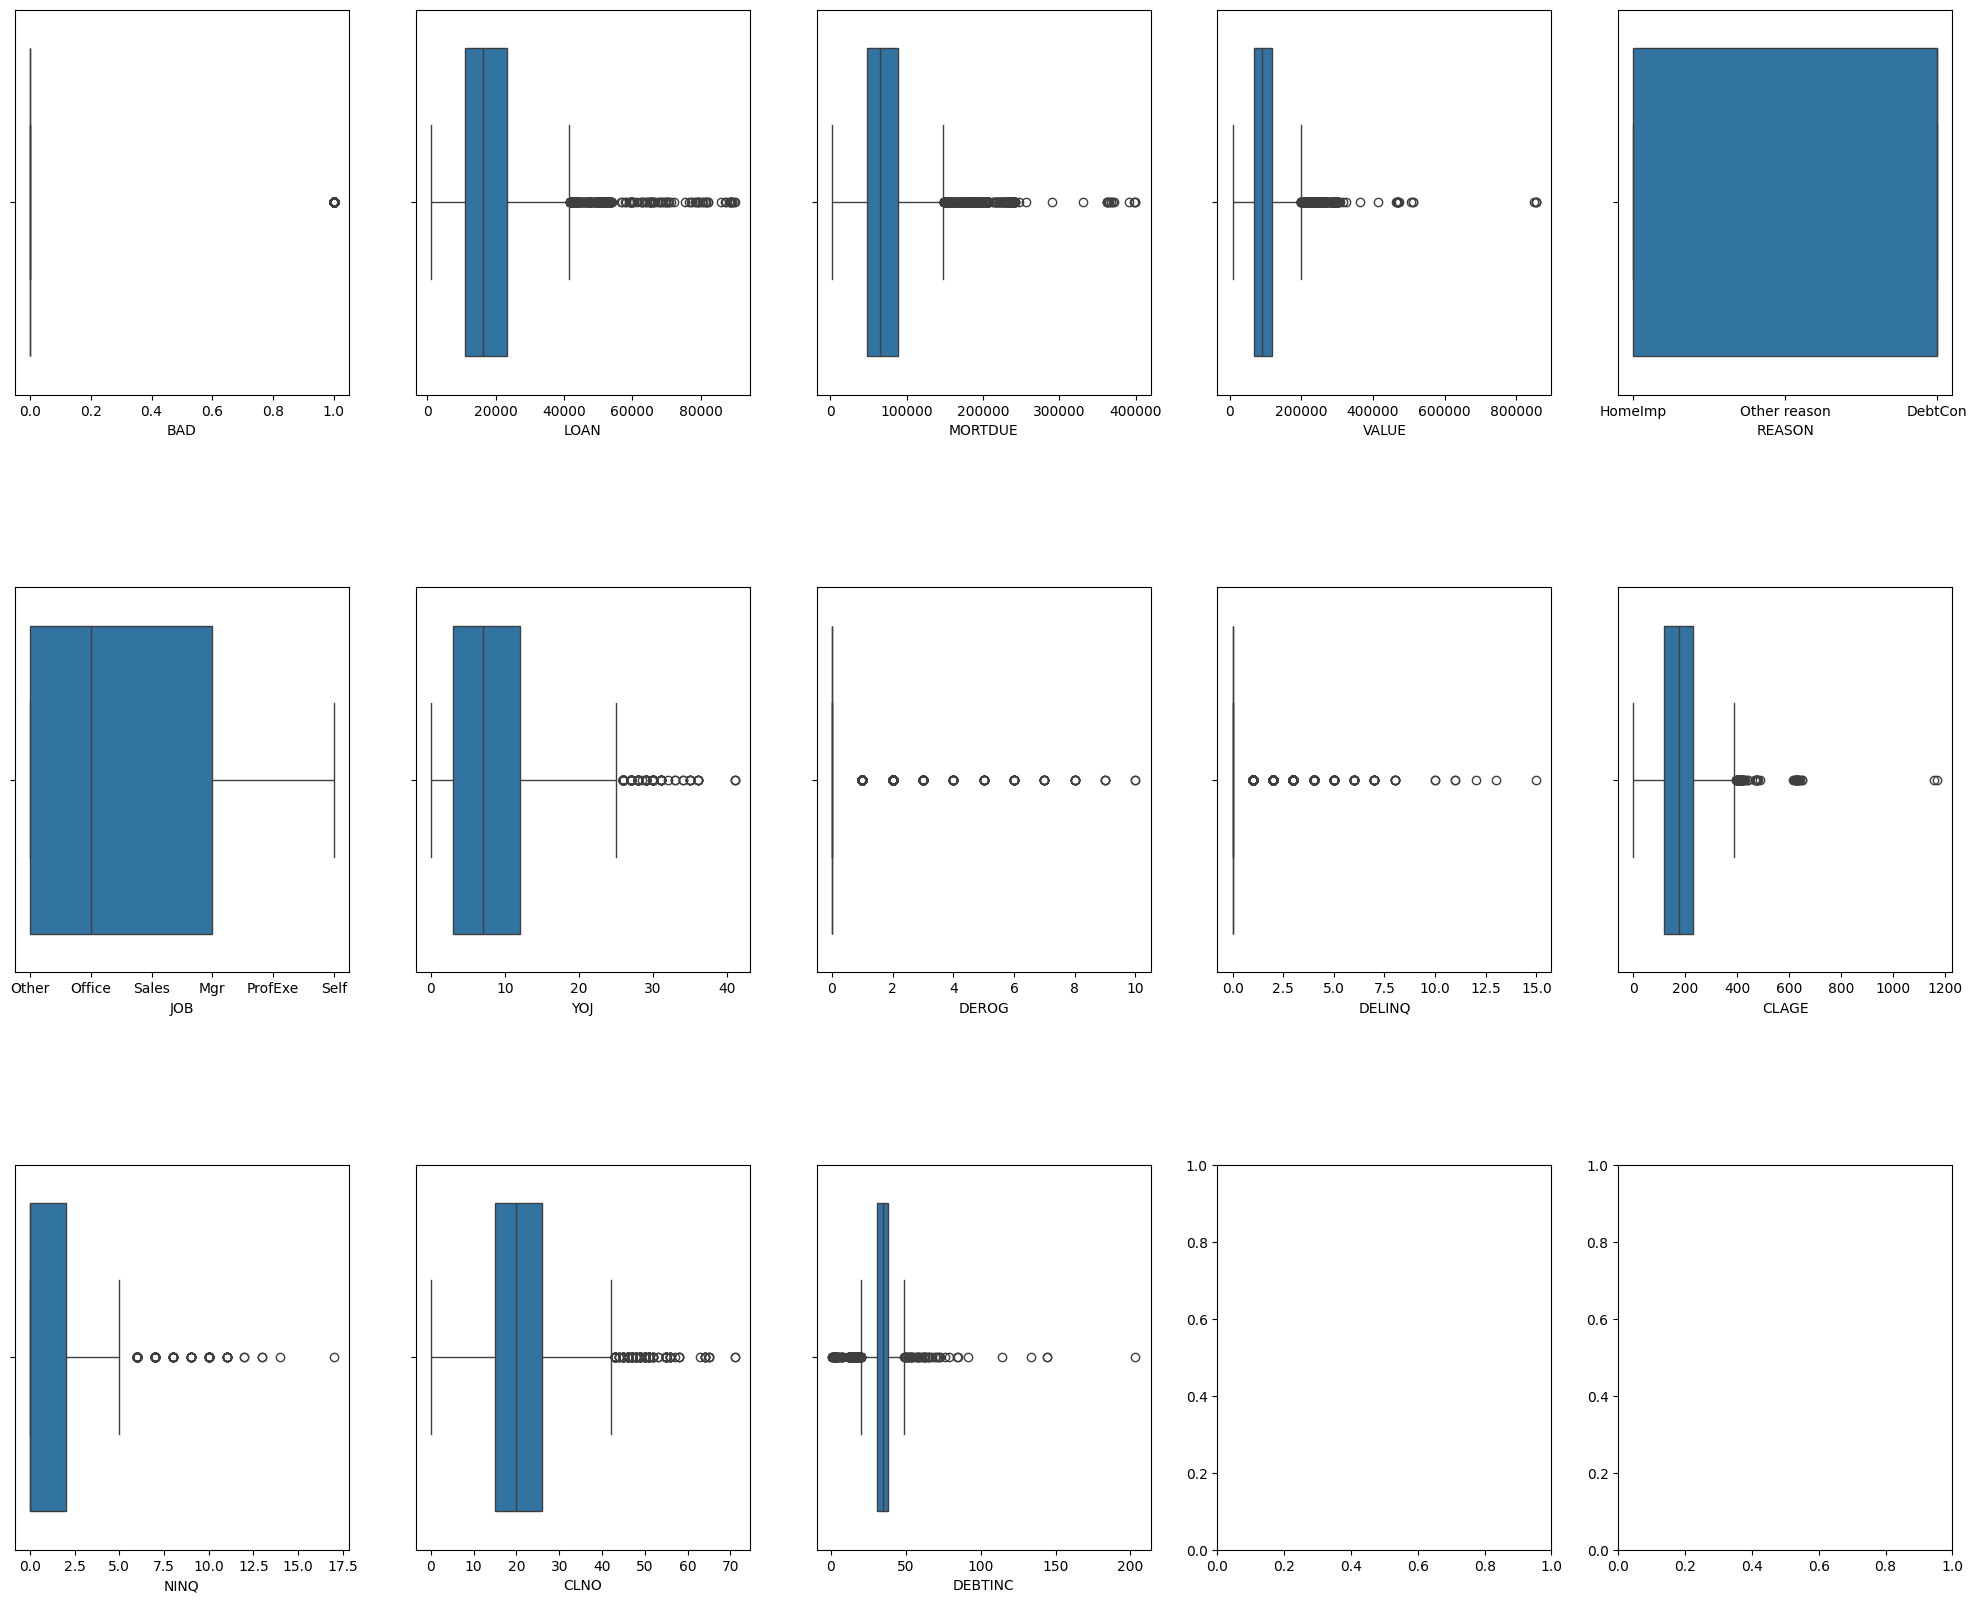

In [14]:
fig, axes = plt.subplots(3, 5, figsize=(25, 20),)
for i,ax in zip(df.columns,axes.flat):
    sns.boxplot(data=df, x=i,ax=ax)    
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Một số biến như DEBTINC, LOAN, MORTDUE, VALUE, CLNO có nhiều outlier

In [21]:
import numpy as np

def remove_outlier_IQR(df):
    df_num = df.select_dtypes(include=[np.number])
    
    
    Q1 = df_num.quantile(0.25)
    Q3 = df_num.quantile(0.75)
    IQR = Q3 - Q1

    df_num_final = df_num[~((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any(axis=1)]

    df_final = df.loc[df_num_final.index]
    return df_final

df3 = remove_outlier_IQR(df)
print("Number of outliers removed: ", df.shape[0] - df3.shape[0])

rate = (df.shape[0] - df3.shape[0]) / df.shape[0] * 100

print(f"Outliers removed: {rate:.2f}%")

Number of outliers removed:  2961
Outliers removed: 49.68%


Lượng outlier bị loại bỏ chiếm ~ 50% dataset. Vì vậy cần thay thế các giá trị sao cho nó vẫn nằm trong biên 

In [22]:
def replace_outlier_IQR(df):
    df_num = df.select_dtypes(include=[np.number])
    columns_to_exclude = ['DEROG', 'BAD', 'DELINQ', 'NINQ', 'CLNO']
    for col in df_num.columns:
        if col not in columns_to_exclude:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_limit = Q1 - 1.5 * IQR
            upper_limit = Q3 + 1.5 * IQR
            df[col] = df[col].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))
    return df

data_train_1 = replace_outlier_IQR(df)

In [23]:
data_train_1.shape

(5960, 13)

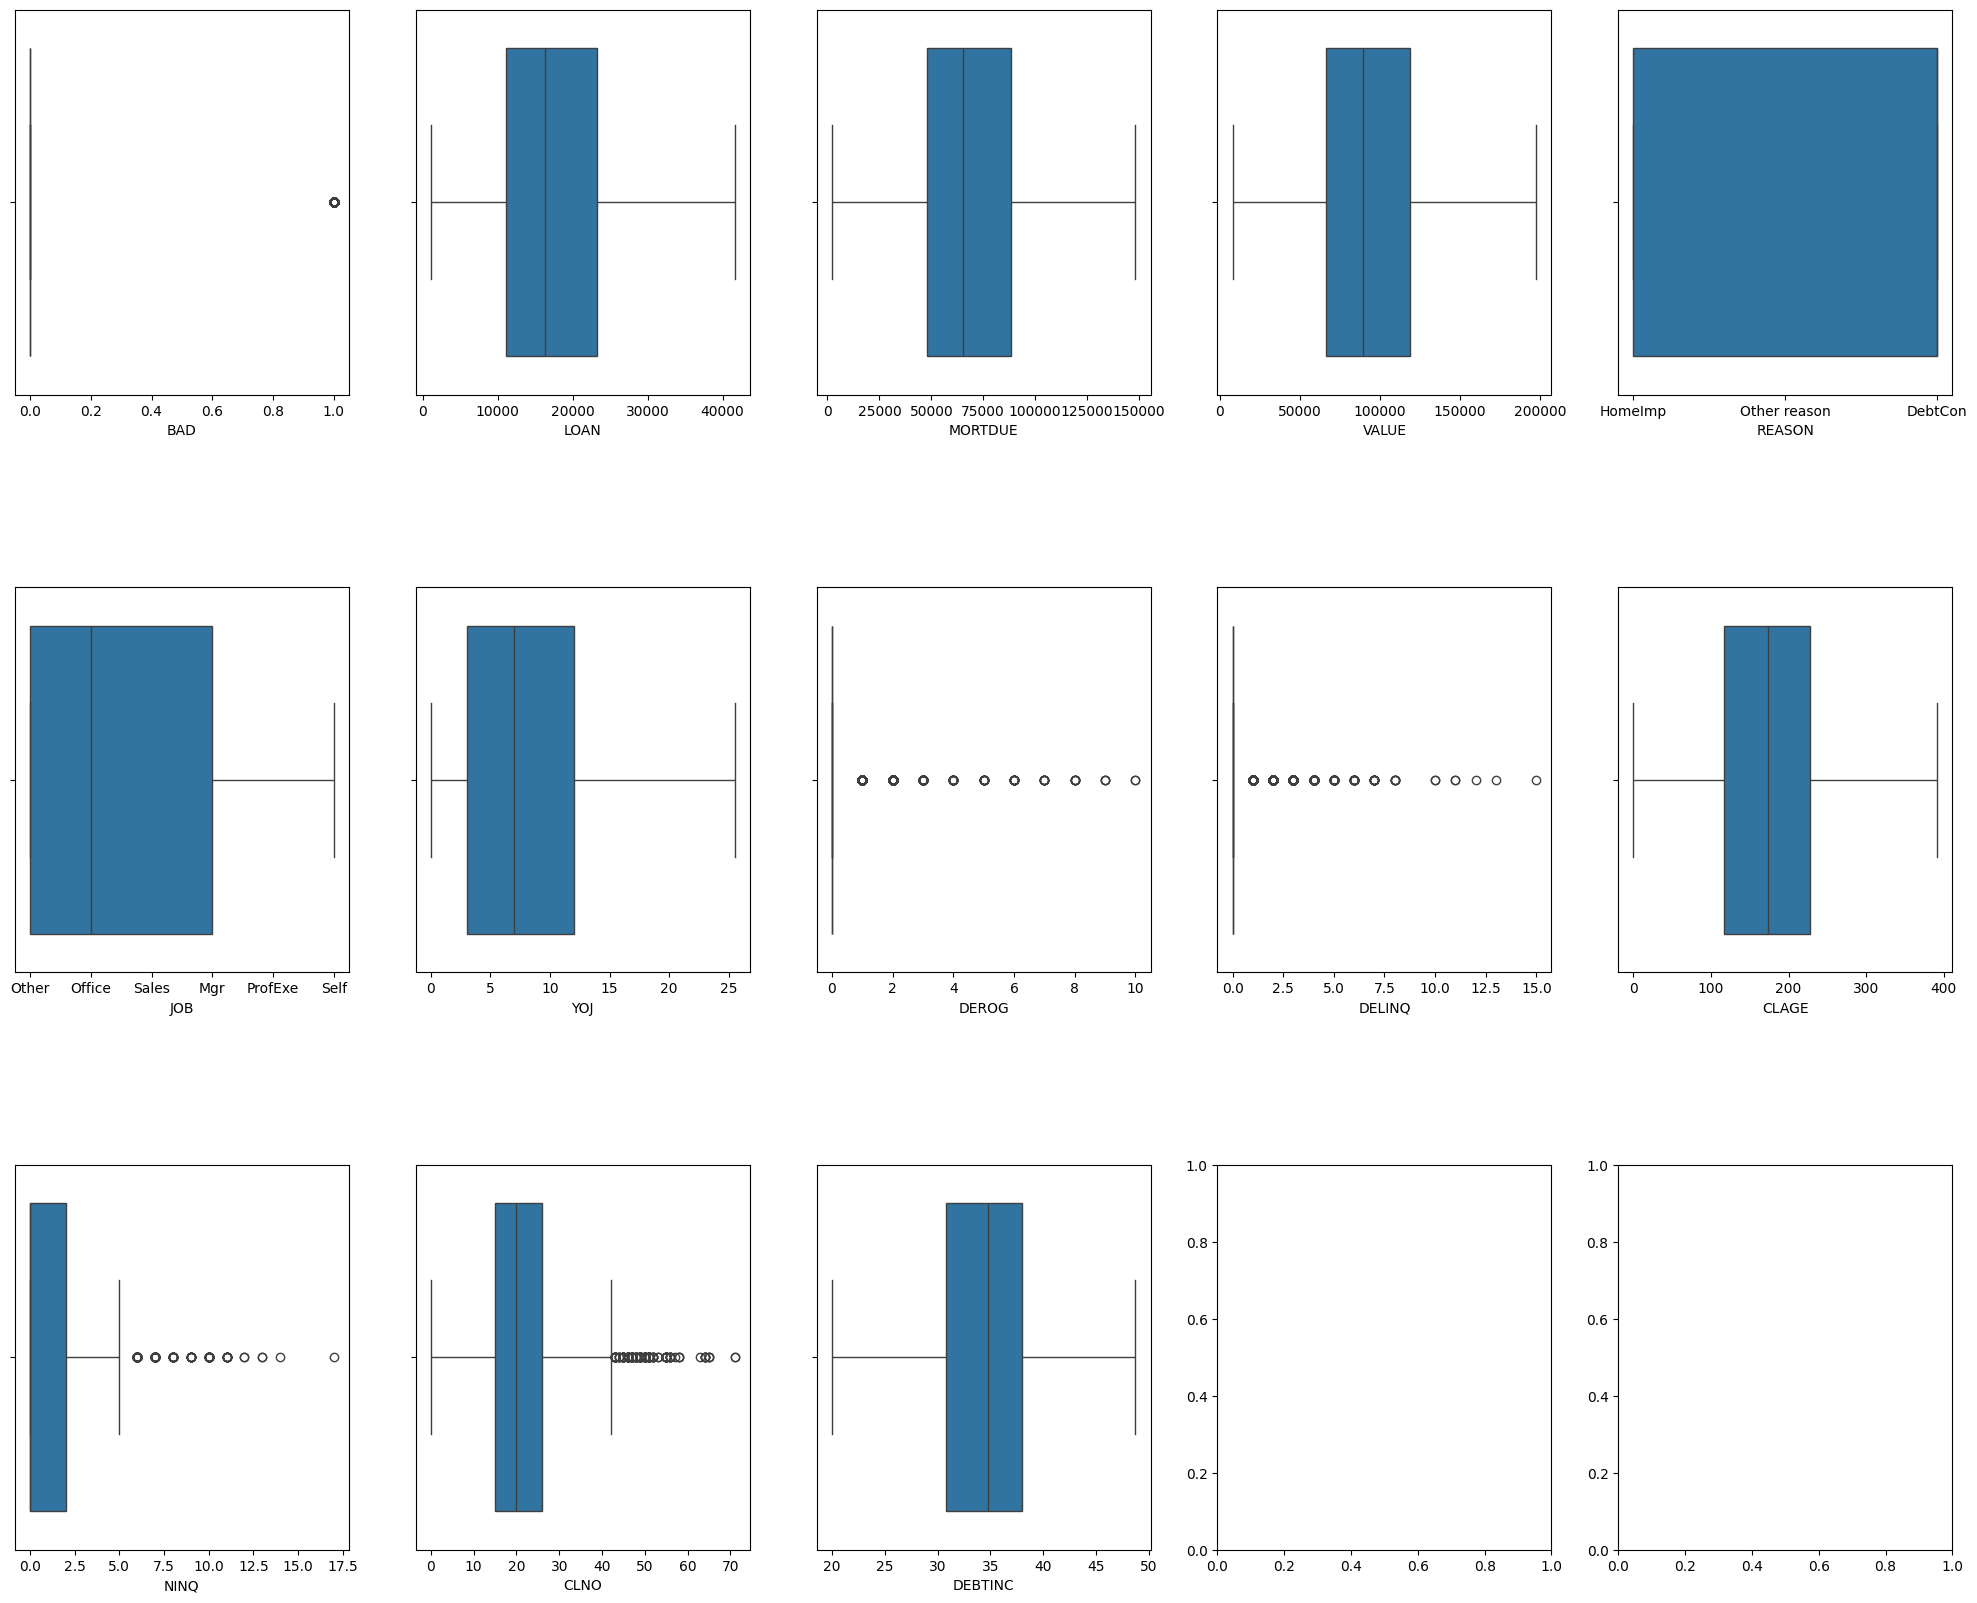

In [24]:
fig, axes = plt.subplots(3, 5, figsize=(25, 20),)
for i,ax in zip(data_train_1.columns,axes.flat):
    sns.boxplot(data=data_train_1, x=i,ax=ax)    
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Handling imbalanced data

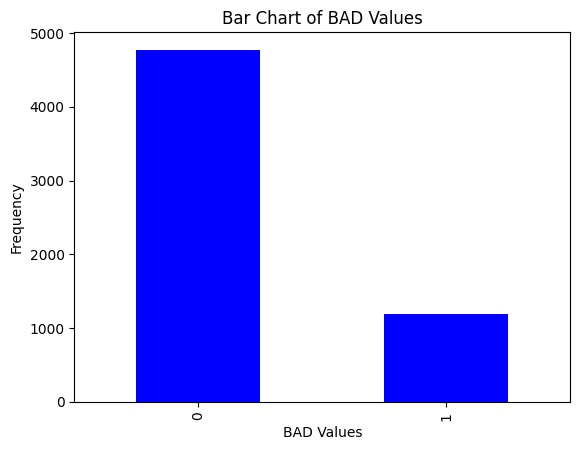

In [26]:
from matplotlib import pyplot as plt

data_train_1['BAD'].value_counts().plot(kind='bar', color='blue')
plt.xlabel('BAD Values')
plt.ylabel('Frequency')
plt.title('Bar Chart of BAD Values')
plt.show()

In [28]:
data_train_1.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,1,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262
2,1,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,1,1500.0,65019.0,89235.5,Other reason,Other,7.0,0.0,0.0,173.466667,0.0,16.0,34.818262
4,0,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262


In [29]:
data_train_1 = data_train_1.join(pd.get_dummies(data_train_1["JOB"]))
data_train_1 = data_train_1.join(pd.get_dummies(data_train_1["REASON"]))

data_train_1.drop(["JOB","REASON"],axis=1,inplace=True)

Sử dụng SMOTE xử lí mất cân bằng nhãn:

In [30]:
from imblearn.over_sampling import SMOTE

y_train_1 = data_train_1["BAD"]
X_train_1 = data_train_1.drop(["BAD"], axis=1)

print("Before SMOTE:", y_train_1.value_counts())

smt = SMOTE(random_state=42)
X_res, y_res = smt.fit_resample(X_train_1, y_train_1)

print("After SMOTE:", pd.Series(y_res).value_counts())

Before SMOTE: BAD
0    4771
1    1189
Name: count, dtype: int64
After SMOTE: BAD
1    4771
0    4771
Name: count, dtype: int64


Normalization (Scaling)

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)

data_train_2 = pd.concat([pd.DataFrame(X_res_scaled, columns=X_res.columns), y_res.reset_index(drop=True)], axis=1)

data_train_2.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,Mgr,Office,Other,ProfExe,Sales,Self,DebtCon,HomeImp,Other reason,BAD
0,-1.733950,-1.238737,-1.271155,0.328103,-0.390069,-0.508211,-1.009869,-0.166404,-1.217158,0.049068,-0.477884,-0.457747,0.932477,-0.577108,-0.18294,-0.245402,-1.611423,1.289913,-0.239099,1
1,-1.712767,0.024001,-0.615327,-0.214021,-0.390069,0.946444,-0.632289,-0.727491,-0.713470,0.049068,-0.477884,-0.457747,0.932477,-0.577108,-0.18294,-0.245402,-1.611423,1.289913,-0.239099,1
2,-1.691584,-1.591903,-1.769583,-0.678698,-0.390069,-0.508211,-0.252419,-0.166404,-1.116420,0.049068,-0.477884,-0.457747,0.932477,-0.577108,-0.18294,-0.245402,-1.611423,1.289913,-0.239099,1
3,-1.691584,-0.119837,-0.150153,-0.214021,-0.390069,-0.508211,0.077505,-0.727491,-0.511995,0.049068,-0.477884,-0.457747,0.932477,-0.577108,-0.18294,-0.245402,-1.611423,-0.775246,4.182373,1
4,-1.670401,0.816823,0.358088,-0.833590,-0.390069,-0.508211,-1.024074,-0.727491,-0.713470,0.049068,-0.477884,2.184613,-1.072412,-0.577108,-0.18294,-0.245402,-1.611423,1.289913,-0.239099,0


Data Reduction with PCA, Feature Selection

In [32]:
X = data_train_2.drop(columns=["BAD"])
y = data_train_2["BAD"]

PCA

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

data_train_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
data_train_pca["BAD"] = y.values
data_train_pca.name = 'Dữ liệu giảm chiều bằng PCA'

explained_variance_ratio = pca.explained_variance_ratio_
information_loss = 1 - np.sum(explained_variance_ratio)
print("Lượng thông tin mất mát: ",information_loss)
data_train_pca.head()

Lượng thông tin mất mát:  0.262348928388895


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,BAD
0,-3.463916,-1.045338,0.372415,-0.453556,-0.479803,-0.057823,0.573658,0.432817,-0.325812,-0.237804,1
1,-2.269962,-1.453033,0.885776,-0.174541,-0.340149,-0.207496,0.625626,0.228596,-0.086573,-0.264291,1
2,-3.719819,-0.969666,0.322937,-0.522468,-0.438076,-0.007884,0.683819,0.152077,-0.104841,-0.277792,1
3,-1.742754,-1.078538,-0.194450,1.640562,-1.287917,0.347855,-1.652735,-0.020520,3.133995,-0.955047,1
4,-0.954457,-2.015648,-0.028652,-2.834488,0.655724,-0.562518,-0.459284,-0.476691,0.777093,-0.894065,0


Automatic Feature Selection

In [34]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

select_k_best = SelectKBest(score_func=mutual_info_classif, k=10) 
X_k_best = select_k_best.fit_transform(X, y)

data_train_autofs = pd.DataFrame(X_k_best, columns=[X.columns[i] for i in select_k_best.get_support(indices=True)])
data_train_autofs["BAD"] = y.values
data_train_autofs.name = 'Dữ liệu giảm chiều bằng SelectKBest'

data_train_autofs.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,BAD
0,-1.733950,-1.238737,-1.271155,0.328103,-0.390069,-0.508211,-1.009869,-0.166404,-1.217158,0.049068,1
1,-1.712767,0.024001,-0.615327,-0.214021,-0.390069,0.946444,-0.632289,-0.727491,-0.713470,0.049068,1
2,-1.691584,-1.591903,-1.769583,-0.678698,-0.390069,-0.508211,-0.252419,-0.166404,-1.116420,0.049068,1
3,-1.691584,-0.119837,-0.150153,-0.214021,-0.390069,-0.508211,0.077505,-0.727491,-0.511995,0.049068,1
4,-1.670401,0.816823,0.358088,-0.833590,-0.390069,-0.508211,-1.024074,-0.727491,-0.713470,0.049068,0


Manual Feature Selection: loại bỏ trường dữ liệu thủ công

In [35]:
data_train_mfs = data_train_2.drop(["HomeImp", "Other reason","Sales", "Self"],axis=1)
data_train_mfs.name = 'Dữ liệu Feature Selection thủ công'

data_train_mfs.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,Mgr,Office,Other,ProfExe,DebtCon,BAD
0,-1.733950,-1.238737,-1.271155,0.328103,-0.390069,-0.508211,-1.009869,-0.166404,-1.217158,0.049068,-0.477884,-0.457747,0.932477,-0.577108,-1.611423,1
1,-1.712767,0.024001,-0.615327,-0.214021,-0.390069,0.946444,-0.632289,-0.727491,-0.713470,0.049068,-0.477884,-0.457747,0.932477,-0.577108,-1.611423,1
2,-1.691584,-1.591903,-1.769583,-0.678698,-0.390069,-0.508211,-0.252419,-0.166404,-1.116420,0.049068,-0.477884,-0.457747,0.932477,-0.577108,-1.611423,1
3,-1.691584,-0.119837,-0.150153,-0.214021,-0.390069,-0.508211,0.077505,-0.727491,-0.511995,0.049068,-0.477884,-0.457747,0.932477,-0.577108,-1.611423,1
4,-1.670401,0.816823,0.358088,-0.833590,-0.390069,-0.508211,-1.024074,-0.727491,-0.713470,0.049068,-0.477884,2.184613,-1.072412,-0.577108,-1.611423,0


Feature Selection + PCA

In [40]:
X1 = data_train_mfs.drop(columns=["BAD"])
y1 = data_train_mfs["BAD"]

pca = PCA(n_components=10)  
X_pca = pca.fit_transform(X1)

data_train_pca_fs = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
data_train_pca_fs["BAD"] = y1.values

data_train_pca_fs.name = 'Dữ liệu Feature Selection + PCA'

explained_variance_ratio = pca.explained_variance_ratio_
information_loss = 1 - np.sum(explained_variance_ratio)
print("Lượng thông tin mất mát: ",information_loss)
data_train_pca_fs.head()

Lượng thông tin mất mát:  0.15707208712607368


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,BAD
0,-3.154899,-0.640504,-0.180062,-0.272545,0.707468,0.394406,-0.981198,-0.252733,0.901890,-0.579207,1
1,-1.894717,-0.550003,0.265114,-0.250422,0.878017,0.234016,-1.729387,0.015865,-0.493976,-1.158222,1
2,-3.424277,-0.645843,-0.229623,-0.191130,0.730072,0.118471,-1.182657,-0.597190,0.277584,0.315818,1
3,-1.605540,-1.147806,-0.130173,-0.609992,0.528837,0.353910,-1.796467,-0.107939,0.025510,-0.057387,1
4,-0.525361,-1.355548,-1.804867,2.216977,0.291156,-0.390498,-1.857171,0.639241,0.146470,-0.608854,0


### Test Models ###

For dataset: Dữ liệu giảm chiều bằng PCA


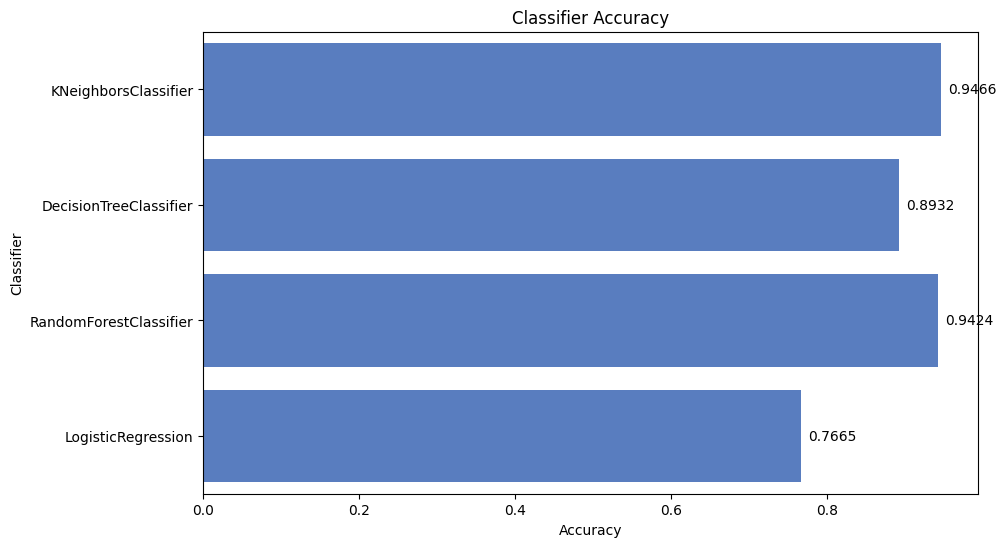

               Classifier  Accuracy
0    KNeighborsClassifier  0.946597
1  DecisionTreeClassifier  0.893194
2  RandomForestClassifier  0.942408
3      LogisticRegression  0.766492

For dataset: Dữ liệu giảm chiều bằng SelectKBest


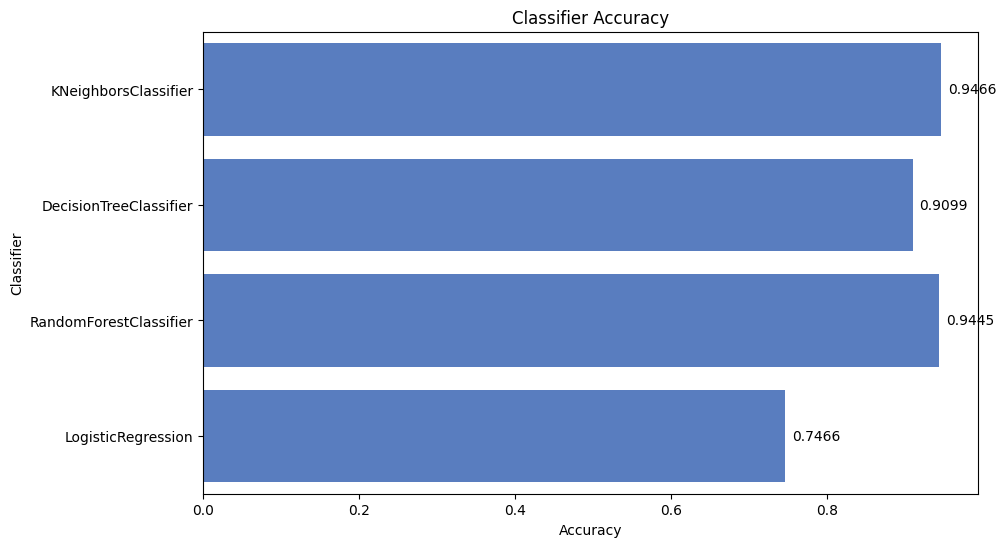

               Classifier  Accuracy
0    KNeighborsClassifier  0.946597
1  DecisionTreeClassifier  0.909948
2  RandomForestClassifier  0.944503
3      LogisticRegression  0.746597

For dataset: Dữ liệu Feature Selection thủ công


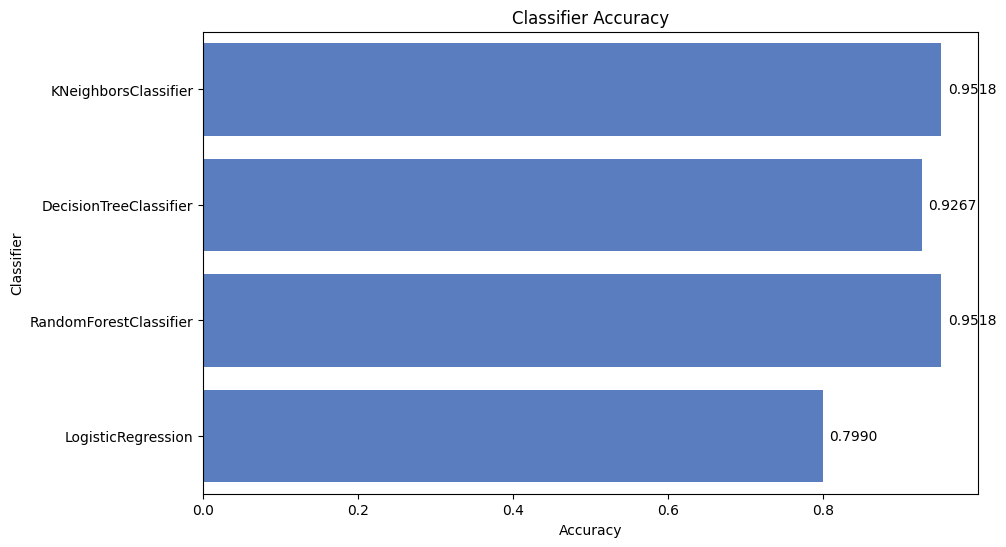

               Classifier  Accuracy
0    KNeighborsClassifier  0.951832
1  DecisionTreeClassifier  0.926702
2  RandomForestClassifier  0.951832
3      LogisticRegression  0.798953

For dataset: Dữ liệu Feature Selection + PCA


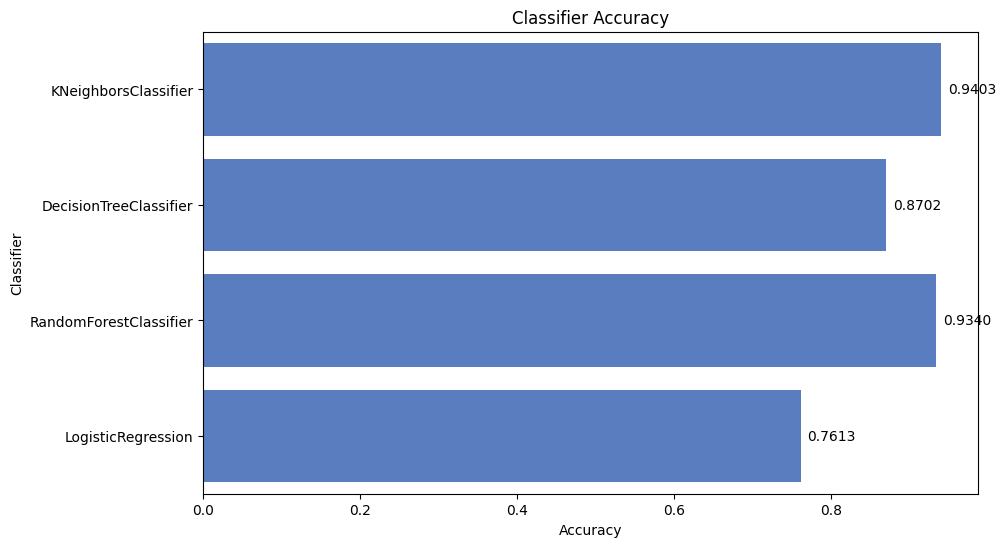

               Classifier  Accuracy
0    KNeighborsClassifier  0.940314
1  DecisionTreeClassifier  0.870157
2  RandomForestClassifier  0.934031
3      LogisticRegression  0.761257



In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def preprocess(df):
    df1 = df.copy()
    y = df1.pop("BAD")
    return df1, y

def analysis(x_train, x_test, y_train, y_test):
    classifiers = [
        KNeighborsClassifier(3),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        LogisticRegression(max_iter=1000)
    ]

    log_cols = ["Classifier", "Accuracy"]
    logs = []  
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(x_train, y_train)
        train_predictions = clf.predict(x_test)
        acc = accuracy_score(y_test, train_predictions)

        log_entry = {"Classifier": name, "Accuracy": acc}
        logs.append(log_entry)

    log = pd.DataFrame(logs)  

    plt.figure(figsize=(10, 6))
    plt.xlabel('Accuracy')
    plt.title('Classifier Accuracy')

    sns.set_color_codes("muted")
    barplots = sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")
    for p in barplots.patches:
        barplots.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y() + p.get_height() / 2),
                           xytext=(5, 0), textcoords='offset points', ha="left", va="center")
    plt.show()
    print(log)


datasets = [data_train_pca, data_train_autofs, data_train_mfs, data_train_pca_fs]

for idx, dataset in enumerate(datasets):
    x, y = preprocess(dataset)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
    print(f"For dataset:",dataset.name)
    analysis(x_train, x_test, y_train, y_test)
    print()